# Objective
Explore trip time, trip distance, and tip percentage

## Reference
- [Taxi Strategy Blog](http://nyctaxistrategy.blogspot.com/2015/03/week-0-exploratory-analysis.html)
- [GitHub Taxi Strategy](https://github.com/samuelklee/taxi-strategy)
- [Deep Yellow](http://deep-yellow.herokuapp.com/)

## Data Source
- [NYC Taxi trips](http://www.andresmh.com/nyctaxitrips/)
- Using 2015 Data as it has time, and better location information

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,10)

### 1. Clean and Merge Data


In [2]:
fares_data_file = '../../trip_fare/trip_fare_2.csv'
trips_data_file = '../../trip_data/trip_data_2.csv'

In [3]:
fares_pd = pd.read_csv(fares_data_file, usecols=[0, 1, 3, 4, 5, 8, 10])
fares_old_columns = fares_pd.columns
fares_pd_columns = [header.strip() for header in fares_old_columns]
fares_pd.columns = fares_pd_columns

print fares_pd_columns
fares_pd.describe()

['medallion', 'hack_license', 'pickup_datetime', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount']


,fare_amount,tip_amount,total_amount
count,1.399018e+07,1.399018e+07,1.399018e+07
mean,1.171375e+01,1.308850e+00,1.403461e+01
std,9.477791e+00,2.046603e+00,1.132226e+01
min,2.500000e+00,0.000000e+00,2.500000e+00
25%,6.500000e+00,0.000000e+00,7.800000e+00
50%,9.000000e+00,1.000000e+00,1.070000e+01
75%,1.350000e+01,2.000000e+00,1.560000e+01
max,5.000000e+02,2.000000e+02,5.400000e+02


In [4]:
fares_pd.head()

,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount
0,1B5C0970F2AE8CFFBA8AE4584BEAED29,D961332334524990D1BBD462E2EFB8A4,2013-02-08 23:35:14,CRD,6.0,0.0,7.0
1,B42249AE16E2B8E556F1CB1F940D6FB4,D4BB308D1F3FCB3434D9DB282CDC93D7,2013-02-07 12:20:16,CRD,20.0,3.0,23.5
2,890699222C47C09FBC898758CEC69762,6318C3AEC02248928C3345B5805EB905,2013-02-08 08:56:54,CRD,5.0,1.1,6.6
3,74B7D835C2CD98606D5256DA8A38E045,D5E278C918256D1F97680A1F04D290E0,2013-02-08 09:37:02,CRD,11.0,2.3,13.8
4,4003B8478418FEC5D761E2F37602769B,0B766F1054A5C16D86BC023858BD8143,2013-02-08 19:31:25,CRD,13.0,1.5,16.0


In [5]:
fares_short_pd = fares_pd
fares_short_pd['medallion'] = fares_pd['medallion'].apply(lambda x: x[:8])
fares_short_pd['hack_license'] = fares_pd['hack_license'].apply(lambda x: x[:8])
del fares_pd

In [6]:
fares_short_pd.to_csv('../data/trip_fare_short_2.csv')
del fares_short_pd

In [7]:
trips_pd = pd.read_csv(trips_data_file, usecols=[1]+range(5, 14))
trips_old_columns = trips_pd.columns
trips_pd_columns = [header.strip() for header in trips_old_columns]
trips_pd.columns = trips_pd_columns

print trips_pd_columns
trips_pd.describe()

['hack_license', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399006e+07,1.399006e+07
mean,1.697176e+00,7.018565e+02,2.741612e+00,-7.260812e+01,3.999751e+01,-7.256355e+01,3.997638e+01
std,1.371377e+00,5.016367e+02,3.199852e+00,1.023242e+01,7.406544e+00,1.039753e+01,7.403986e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.120047e+03,-3.447918e+03,-2.491214e+03,-3.481128e+03
25%,1.000000e+00,3.600000e+02,1.000000e+00,-7.399213e+01,4.073512e+01,-7.399143e+01,4.073415e+01
50%,1.000000e+00,5.890000e+02,1.700000e+00,-7.398190e+01,4.075275e+01,-7.398042e+01,4.075306e+01
75%,2.000000e+00,9.000000e+02,3.070000e+00,-7.396705e+01,4.076736e+01,-7.396415e+01,4.076808e+01
max,2.080000e+02,1.080000e+04,1.000000e+02,2.228766e+03,3.210358e+03,2.228768e+03,3.577132e+03


In [8]:
trips_short_pd = trips_pd
trips_short_pd['hack_license'] = trips_pd['hack_license'].apply(lambda x: x[:8])
del trips_pd

In [9]:
trips_short_pd.to_csv('../data/trip_data_short_2.csv')
del trips_short_pd

### Merge fare and trip

In [10]:
fares_data_file = '../data/trip_fare_short_2.csv'
trips_data_file = '../data/trip_data_short_2.csv'

fares_pd = pd.read_csv(fares_data_file)
trips_pd = pd.read_csv(trips_data_file)

taxi_pd = pd.merge(fares_pd, trips_pd, how='outer')
del fares_pd, trips_pd

taxi_pd.head()

,Unnamed: 0,medallion,hack_license,pickup_datetime,payment_type,fare_amount,tip_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0,1B5C0970,D9613323,2013-02-08 23:35:14,CRD,6.0,0.0,7.0,2013-02-08 23:42:58,1,463,0.8,-73.992439,40.724487,-73.984421,40.718903
1,1,B42249AE,D4BB308D,2013-02-07 12:20:16,CRD,20.0,3.0,23.5,2013-02-07 12:50:27,4,1810,3.1,-73.989494,40.769588,-73.990303,40.737347
2,2,89069922,6318C3AE,2013-02-08 08:56:54,CRD,5.0,1.1,6.6,2013-02-08 08:59:43,1,168,1.0,-73.963036,40.799141,-73.972168,40.786446
3,3,74B7D835,D5E278C9,2013-02-08 09:37:02,CRD,11.0,2.3,13.8,2013-02-08 09:50:50,1,828,2.1,-73.987953,40.728764,-74.007118,40.705399
4,4,4003B847,0B766F10,2013-02-08 19:31:25,CRD,13.0,1.5,16.0,2013-02-08 19:46:23,1,897,3.3,-73.987282,40.743042,-74.010284,40.703964


In [11]:
taxi_pd.to_csv('../data/taxi_short_2.csv')
del taxi_pd

In [12]:
taxi_pd = pd.read_csv('../data/taxi_short_2.csv')
taxi_pd.describe()

,Unnamed: 0,Unnamed: 0.1,fare_amount,tip_amount,total_amount,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399018e+07,1.399006e+07,1.399006e+07
mean,6.995088e+06,6.995088e+06,1.171375e+01,1.308850e+00,1.403461e+01,1.697176e+00,7.018565e+02,2.741612e+00,-7.260812e+01,3.999751e+01,-7.256355e+01,3.997638e+01
std,4.038616e+06,4.038616e+06,9.477791e+00,2.046603e+00,1.132226e+01,1.371377e+00,5.016367e+02,3.199852e+00,1.023242e+01,7.406544e+00,1.039753e+01,7.403986e+00
min,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.120047e+03,-3.447918e+03,-2.491214e+03,-3.481128e+03
25%,3.497544e+06,3.497544e+06,6.500000e+00,0.000000e+00,7.800000e+00,1.000000e+00,3.600000e+02,1.000000e+00,-7.399213e+01,4.073512e+01,-7.399143e+01,4.073415e+01
50%,6.995088e+06,6.995088e+06,9.000000e+00,1.000000e+00,1.070000e+01,1.000000e+00,5.890000e+02,1.700000e+00,-7.398190e+01,4.075275e+01,-7.398042e+01,4.075306e+01
75%,1.049263e+07,1.049263e+07,1.350000e+01,2.000000e+00,1.560000e+01,2.000000e+00,9.000000e+02,3.070000e+00,-7.396705e+01,4.076736e+01,-7.396415e+01,4.076808e+01
max,1.399018e+07,1.399018e+07,5.000000e+02,2.000000e+02,5.400000e+02,2.080000e+02,1.080000e+04,1.000000e+02,2.228766e+03,3.210358e+03,2.228768e+03,3.577132e+03


### Estimate Tip Percentage

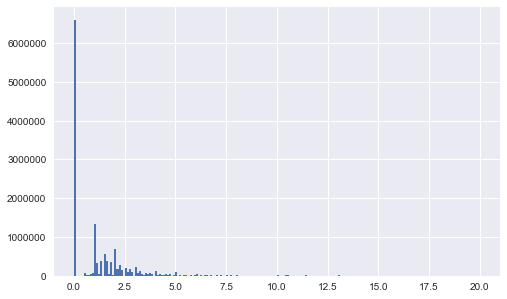

In [19]:
# 
plt.figure(figsize=(8,4.95))
plt.hist(taxi_pd['tip_amount'], bins=200, range=(0,20))
plt.show()

In [17]:
taxi_pd['tip_frac'] = (100.*taxi_pd.tip_amount \
                       /(taxi_pd.total_amount - taxi_pd.tip_amount))
taxi_pd['tip_frac'].describe()

count    1.399018e+07
mean     9.916805e+00
std      1.358179e+01
min      0.000000e+00
25%      0.000000e+00
50%      8.695652e+00
75%      1.944444e+01
max      5.333333e+03
Name: tip_frac, dtype: float64

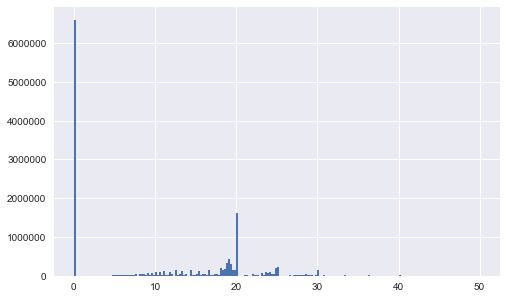

In [21]:
# 
plt.figure(figsize=(8,4.95))
plt.hist(taxi_pd['tip_frac'], bins=200, range=(0,50));

### 2. Basic cleanup 

In [22]:
#NYW Lat and Longitude
center_lat = 40.76
center_lng = -73.925
dlat = 0.125
dlng = 0.125

In [24]:
taxi_filter_pd = pd.DataFrame(taxi_pd[(taxi_pd.trip_distance <= 50) & 
                                    (taxi_pd.trip_distance > 0.1) &
                                    (taxi_pd.trip_time_in_secs > 1) &
                                    (taxi_pd.fare_amount < 50) &
                                    (taxi_pd.fare_amount*2 % 1 == 0) &
                                    (taxi_pd.tip_frac >= 0.1) &
                                    (taxi_pd.tip_frac < 50) & 
                                    (taxi_pd.pickup_latitude > center_lat - dlat) &
                                    (taxi_pd.pickup_latitude < center_lat + dlat) &
                                    (taxi_pd.pickup_longitude > center_lng - dlng) &
                                    (taxi_pd.pickup_longitude < center_lng + dlng)])

del taxi_pd

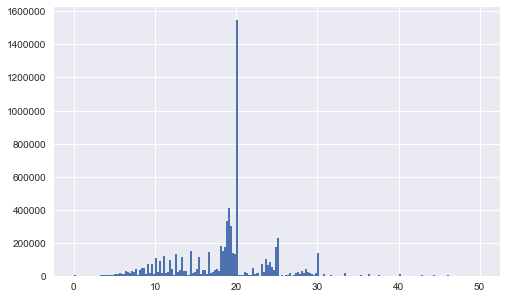

In [25]:
# zero and autotipping issue
plt.figure(figsize=(8,4.95))
plt.hist(taxi_filter_pd['tip_frac'], bins=200, range=(0,50));

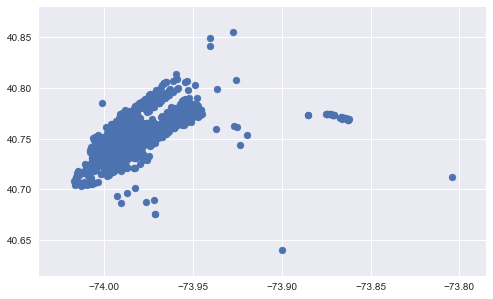

In [26]:
pickups = taxi_filter_pd[['pickup_longitude', 'pickup_latitude']].values

plt.figure(figsize=(8, 4.95))
plt.rcParams.update({'font.size': 14})
plt.scatter(pickups[:1000,0], pickups[:1000,1])
plt.show()

### 3. Bin Data

In [27]:
dist_max = 12.
time_max = 35.*60.
tip_frac_max = 30.
ndistbins = 15
ntimebins = 15
ntipbins = 30
trip_dist_bins = np.linspace(0, dist_max, ndistbins)
trip_time_bins = np.linspace(0, time_max, ntimebins)
tip_frac_bins = np.linspace(0, tip_frac_max, ntipbins)

In [28]:
cdist = pd.cut(taxi_filter_pd.trip_distance.values, trip_dist_bins)
ctime = pd.cut(taxi_filter_pd.trip_time_in_secs.values, trip_time_bins)
ctip = pd.cut(taxi_filter_pd.tip_frac.values, tip_frac_bins)

In [29]:
cdist

[(2.571, 3.429], (0.857, 1.714], (1.714, 2.571], (2.571, 3.429], (6.857, 7.714], ..., (1.714, 2.571], (6.857, 7.714], (2.571, 3.429], (0, 0.857], (0.857, 1.714]]
Length: 7026719
Categories (14, object): [(0, 0.857] < (0.857, 1.714] < (1.714, 2.571] < (2.571, 3.429] ... (8.571, 9.429] < (9.429, 10.286] < (10.286, 11.143] < (11.143, 12]]

In [32]:
s_tipfrac = pd.Series(taxi_filter_pd.tip_frac)

In [30]:
cdist.codes

array([3, 1, 2, ..., 3, 0, 1], dtype=int8)

In [31]:
ctip.codes

array([14, 19, 19, ..., 18, 26, 18], dtype=int8)

In [33]:
gb_dist_tip_cnts = s_tipfrac.groupby([cdist.codes, ctip.codes]).count()
gb_tip_time_cnts = s_tipfrac.groupby([ctip.codes, ctime.codes]).count()
gb_dist_time_mean = s_tipfrac.groupby([cdist.codes, ctime.codes]).mean()

In [34]:
mi1 = pd.MultiIndex.from_product([range(-1, ndistbins-1), range(-1, ntipbins-1)], names=['dist', 'tip'])
mi2 = pd.MultiIndex.from_product([range(-1, ntipbins-1), range(-1, ntimebins-1)], names=['tip', 'time'])
mi3 = pd.MultiIndex.from_product([range(-1, ndistbins-1), range(-1, ntimebins-1)], names=['dist', 'time'])

gb_dist_tip_cnts_ri = gb_dist_tip_cnts.reindex(mi1).fillna(0)
gb_tip_time_cnts_ri = gb_tip_time_cnts.reindex(mi2).fillna(0)
gb_dist_time_mean_ri = gb_dist_time_mean.reindex(mi3).fillna(0)

### 4. plot

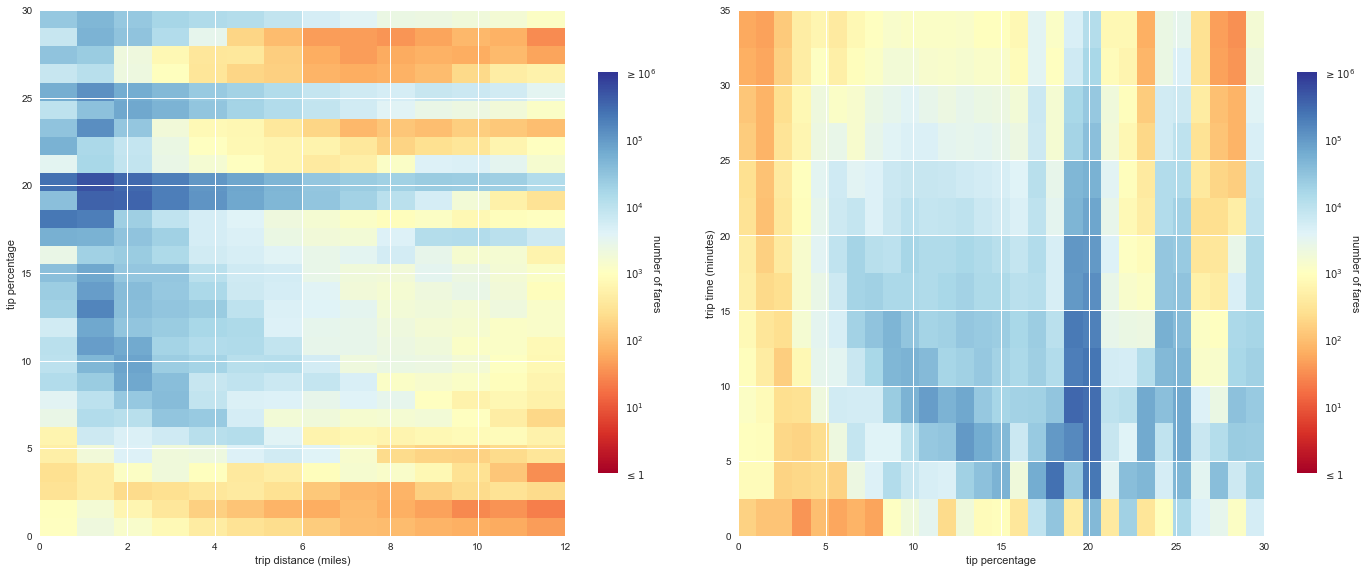

In [41]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 24})

#frequency of tip percentage vs. distance
plt.subplot(1, 2, 1)
extent = [trip_dist_bins[0], trip_dist_bins[-1], tip_frac_bins[0], tip_frac_bins[-1]]
plt.imshow(np.log10(np.reshape(gb_dist_tip_cnts_ri.values, (ndistbins, ntipbins)).T[1:, 1:]),
       origin='lower', extent=extent, aspect=dist_max/tip_frac_max, interpolation='none', vmin=0, vmax=6, 
           cmap="RdYlBu")
plt.xlabel('trip distance (miles)')
plt.ylabel('tip percentage')
cbar = plt.colorbar(shrink=0.6, ticks=[0, 1, 2, 3, 4, 5, 6])
cbar.set_label('number of fares', rotation=270, labelpad=5)
cbar.set_ticklabels([r'$\leq1$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$\geq10^6$'])

plt.subplot(1, 2, 2)
extent = [tip_frac_bins[0], tip_frac_bins[-1], trip_time_bins[0]/60., trip_time_bins[-1]/60.]
plt.imshow(np.log10(np.reshape(gb_tip_time_cnts_ri.values, (ntipbins, ntimebins)).T[1:, 1:]),
       origin='lower', extent=extent, aspect=tip_frac_max/(time_max/60.), interpolation='none', vmin=0, vmax=6, 
          cmap="RdYlBu")
plt.xlabel('tip percentage')
plt.ylabel('trip time (minutes)')
cbar = plt.colorbar(shrink=0.6, ticks=[0, 1, 2, 3, 4, 5, 6])
cbar.set_label('number of fares', rotation=270, labelpad=5)
cbar.set_ticklabels([r'$\leq1$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$\geq10^6$'])

plt.tight_layout()
plt.savefig('number_of_fares.png')
plt.show()

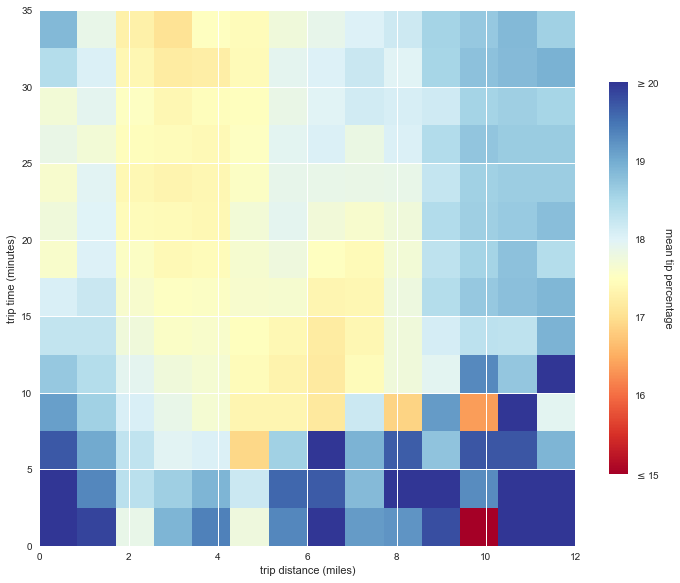

In [49]:
plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 24})
#mean tip percentage vs. distance and time
#subplot(2, 2, 3)
extent = [trip_dist_bins[0], trip_dist_bins[-1], trip_time_bins[0]/60., trip_time_bins[-1]/60.]
plt.imshow(np.reshape(gb_dist_time_mean_ri.values, (ndistbins, ntimebins)).T[1:, 1:],
       origin='lower', extent=extent, aspect=dist_max/(time_max/60.), interpolation='None', vmin=15, vmax=20,
          cmap="RdYlBu")
plt.xlabel('trip distance (miles)')
plt.ylabel('trip time (minutes)')
cbar = plt.colorbar(shrink=0.6, ticks=[15, 16, 17, 18, 19, 20])
cbar.set_label('mean tip percentage', rotation=270, labelpad=13)
cbar.set_ticklabels([r'$\leq$15', '16', '17', '18', '19', r'$\geq$20'])

#plt.tight_layout(h_pad=-6, w_pad=2)
# plt.savefig('dist_time_auto_tip.png')
plt.show()

In [50]:
center_lat = 40.76
center_lng = -73.925
dlat = 0.125
dlng = 0.125
nlatbins = 100
nlngbins = 100

def drop_mean(ary):
    if ary.size < 50:
        return 0.
    return np.mean(ary)

In [52]:
lng_bins = np.linspace(center_lng - dlng, center_lng + dlng, nlngbins)
lat_bins = np.linspace(center_lat - dlat, center_lat + dlat, nlatbins)

clng = pd.cut(taxi_filter_pd.pickup_longitude.values, lng_bins)
clat = pd.cut(taxi_filter_pd.pickup_latitude.values, lat_bins)

s_tipfrac = pd.Series(taxi_filter_pd.tip_frac)
gb_mean = s_tipfrac.groupby([clng.codes, clat.codes]).apply(drop_mean)
gb_cnts = s_tipfrac.groupby([clng.codes, clat.codes]).count()
mi = pd.MultiIndex.from_product([range(-1, nlngbins-1), range(-1, nlatbins-1)], names=['lng', 'lat'])
gb_mean_ri = gb_mean.reindex(mi).fillna(0)
gb_cnts_ri = gb_cnts.reindex(mi).fillna(0)

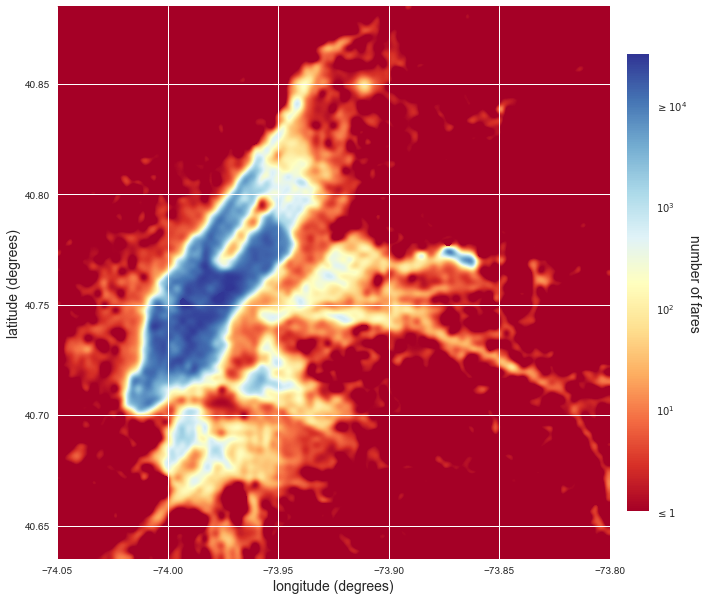

In [53]:
plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 20})
#plt.subplot(1, 2, 1)
weighted_coord_bins_cnts = np.reshape(gb_cnts_ri.values, (nlngbins, nlatbins))
extent = [lng_bins[0], lng_bins[-1], lat_bins[0], lat_bins[-1]]
plt.imshow(np.log10(weighted_coord_bins_cnts.T[1:, 1:] + 0.1), interpolation='bicubic', origin='lower', 
       extent=extent, vmin=0, vmax=4.5, cmap="RdYlBu")
plt.xlabel('longitude (degrees)', size=14)
plt.ylabel('latitude (degrees)', size=14)
cbar = plt.colorbar(shrink=0.7, ticks=[0, 1, 2, 3, 4], pad=0.025)
cbar.set_label('number of fares', rotation=270, labelpad=13, size=14)
cbar.set_ticklabels([r'$\leq1$', r'$10^1$', r'$10^2$', r'$10^3$', r'$\geq10^4$'])

### Next Zone Data and Identify the Good, the Bad, and the Ugly Drivers!

### Thank You! 